In [26]:
# Import all required packages

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Read MNIST Dataset
input  = pd.read_csv('MNIST_Train.csv')
labels = input['label']
features = input.drop('label',axis = 1)

In [28]:
# Standardize Data
standardized_data = StandardScaler().fit_transform(features)
print(standardized_data.shape)

(42000, 784)


In [29]:
# Call PCA on the Data
pca = decomposition.PCA()

pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

In [30]:
print('After PCA,Shape of the new dataset: ',pca_data.shape)

After PCA,Shape of the new dataset:  (42000, 2)


In [31]:
# Prepare data for visualization
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data = pca_data,columns= ("1st_principal", "2nd_principal", "label"))

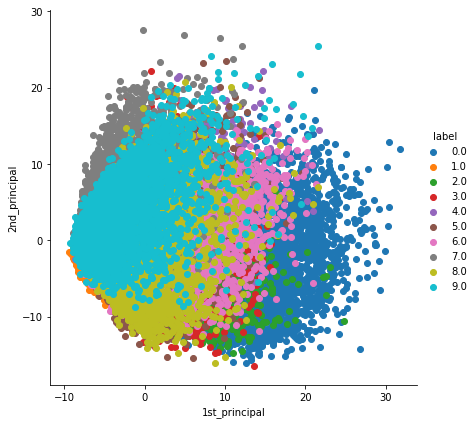

In [32]:
sn.FacetGrid(pca_df,hue = 'label',size = 6).map(plt.scatter,"1st_principal", "2nd_principal").add_legend()
plt.show()